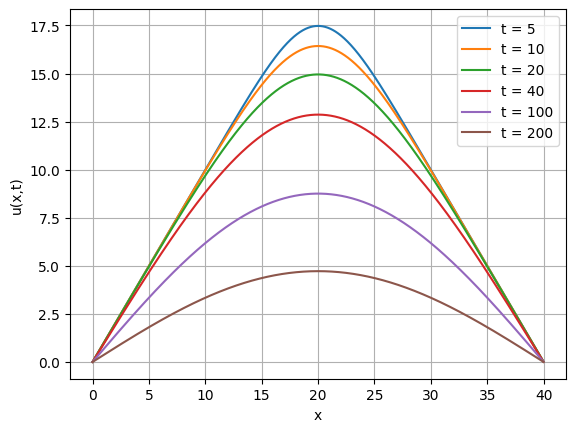

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 40  # Length of rod
x = np.arange(0, L, 0.01)  # Extent of plot
Nterms = 20  # Number of terms in series

# Plotting
plt.figure()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x,t)')

# Time values to plot
time_values = [5, 10, 20, 40, 100, 200]

# Loop over each time value and calculate the Fourier series sum
for t in time_values:
    u = np.zeros_like(x)  # Initialize u(x,t) to zero
    for n in range(1, Nterms + 1):
        coef = 160 * np.sin(n * np.pi / 2) / (n**2 * np.pi**2)
        e = np.exp(-n**2 * np.pi**2 * t / 1600)
        s = np.sin(n * np.pi * x / L)
        u += coef * e * s  # Fourier sum

    # Plot the result for this time t
    plt.plot(x, u, label=f't = {t}')

# Place the legend outside the plot
plt.legend()
# Show plot
plt.show()

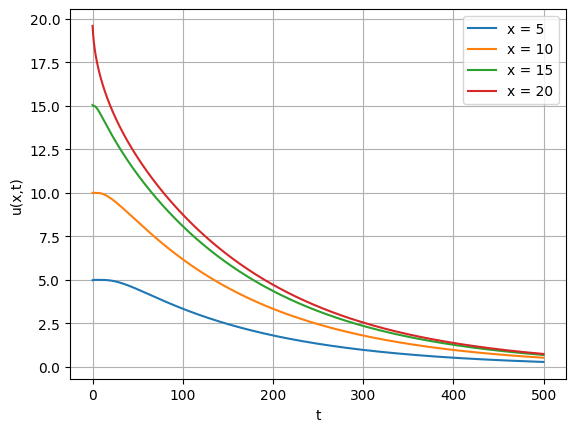

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 40  # Length of the rod
t = np.arange(0, 500, 0.1)  # Time array
Nterms = 20  # Number of terms in the Fourier series

# Set up the plot
plt.figure()
plt.grid(True)

# Loop over different x positions to plot the solution
for x in [5, 10, 15, 20]:
    u = np.zeros_like(t)  # Initialize the solution array
    for n in range(1, Nterms + 1):
        coef = 160 * np.sin(n * np.pi / 2) / (n**2 * np.pi**2)  # Fourier coefficient
        e = np.exp(-n**2 * np.pi**2 * t / 1600)  # Exponential term
        s = np.sin(n * np.pi * x / L)  # Sine term
        u += coef * e * s  # Add the Fourier term to the solution

    # Plot the result for this x position
    plt.plot(t, u, label=f'x = {x}', linewidth=1.5)

# Labeling and legend
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.legend()

# Show the plot
plt.show()

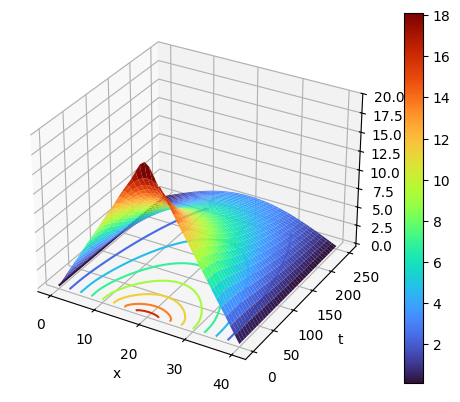

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
L = 40  # Length of the rod
T = 250  # Length of time to display
Nterms = 20  # Number of terms in the Fourier series

# Create the meshgrid for x and t
x = np.linspace(0, L, L+1)  # x values from 0 to L
t = np.linspace(0, T, T+1)  # t values from 0 to T
X, T_mesh = np.meshgrid(x, t)  # Create the grid for x and t

# Initialize the solution u(x,t)
u = np.zeros_like(X)

# Compute the Fourier series solution
for n in range(1, Nterms + 1):
    coef = 160 * np.sin(n * np.pi / 2) / (n**2 * np.pi**2)
    e = np.exp(-n**2 * np.pi**2 * T_mesh / 1600)
    s = np.sin(n * np.pi * X / L)
    u += coef * e * s  # Fourier sum

# Plotting the surface and contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, T_mesh, u, cmap='turbo')

# Contour plot
contour = ax.contour(X, T_mesh, u, zdir='z', offset=np.min(u), cmap='turbo')

# Set labels
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

# Set view angle

# Show the color bar
fig.colorbar(surf)

# Display the plot
plt.show()

In [8]:
import numpy as np

# Parameters
L = 40  # Length of the rod
x = L / 2  # Point to measure temperature (center of the rod)
T = 400  # Start time
Nterms = 20  # Number of terms in the Fourier series
MaxTemp = 5  # Initial temperature value

# Loop until temperature falls below 1.0
while MaxTemp > 1.0:
    T += 0.005  # Increment the time
    u = 0  # Reset the temperature
    for n in range(1, Nterms + 1):
        coef = 160 * np.sin(n * np.pi / 2) / (n**2 * np.pi**2)
        e = np.exp(-n**2 * np.pi**2 * T / 1600)  # Exponential decay
        s = np.sin(n * np.pi * x / L)  # Sine term at x = L/2
        u += coef * e * s  # Sum the Fourier terms to get temperature

    MaxTemp = u  # Update MaxTemp

# Print the final time and temperature
print(f"Time (T) = {T:.3f}, MaxTemp = {MaxTemp:.3f}")

Time (T) = 451.605, MaxTemp = 1.000


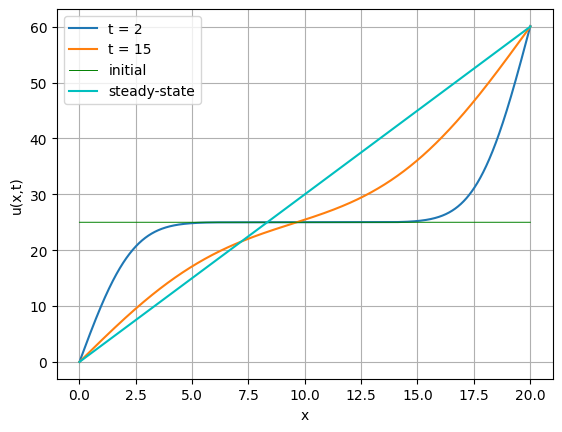

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
a2 = 0.8418  # Thermal diffusivity for aluminum
L = 20  # Length of rod in cm
x = np.arange(0, L+0.01, 0.01)  # Discretized spatial domain
u0 = np.ones_like(x) * 25  # Initial condition
v = 3 * x  # Steady-state temperature
Nterms = 10  # Number of terms in Fourier series

# Plotting
plt.figure()
plt.grid(True)

# Loop for different times t
for t in [2, 15]:
    w = 0  # Initialize Fourier series sum
    for n in range(1, Nterms + 1):
        coef = (50 + 70 * np.cos(n * np.pi)) / (n * np.pi)
        e = np.exp(-n**2 * np.pi**2 * a2 * t / L**2)
        s = np.sin(n * np.pi * x / L)
        w += coef * e * s  # Fourier series sum
    
    u = v + w
    plt.plot(x, u, label=f't = {t}', linewidth=1.5)

# Plot initial condition and steady-state temperature
plt.plot(x, u0, 'g', label='initial', linewidth=0.7)
plt.plot(x, v, 'c', label='steady-state', linewidth=1.5)

# Labels and legend
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()

# Show plot
plt.show()
